# Cápsula Isolation Forest

### Materiales

Lo que necesitamos es scikit-learn, mpl_toolkits y matplotlib. 


Carpeta data usada en las cápsulas anteriores y se encuentra en el github.

### ¿Qué haremos?

Utilizaremos isolation forest para encontrar los países 
en los cuales sus atributos se consideran anómalos.

## ¿Qué es Isolation Forest? 

Es una técnica de machine learning (ML) relativamente nueva para la identificación de anomalías. Esta diseñado y optimizado para la búsqueda de las mismas. Para encontrar outliers, particiona el conjunto de datos hasta que aisla un valor. Mientras más rápido, el valor, quede aislado, mayor puntaje de anomalía tendrá.   
  
  




### 1. Cargamos los paquetes y los datos

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from mpl_toolkits.mplot3d import Axes3D

In [34]:
covid = pd.read_csv("data/covidtotals.csv")
covid.set_index("iso_code", inplace=True)
covid.columns

Index(['lastdate', 'location', 'total_cases', 'total_deaths', 'total_cases_pm',
       'total_deaths_pm', 'population', 'pop_density', 'median_age',
       'gdp_per_capita', 'hosp_beds'],
      dtype='object')

In [35]:
cols=['location','total_cases_pm','total_deaths_pm', 'pop_density', 'median_age', 'gdp_per_capita']

### 2. Eliminar nulos y estandarizar

In [36]:
estandarizador = StandardScaler()

In [37]:
covid.isnull().sum()

lastdate            0
location            0
total_cases         0
total_deaths        0
total_cases_pm      0
total_deaths_pm     0
population          0
pop_density        12
median_age         24
gdp_per_capita     28
hosp_beds          46
dtype: int64

In [38]:
covid_analisis = covid.loc[:,cols].dropna()

In [39]:
std = estandarizador.fit_transform(covid_analisis.iloc[:,1:])

In [40]:
std

array([[-3.54798127e-01, -3.38797633e-01, -2.35023266e-01,
        -1.31297684e+00, -8.77010446e-01],
       [-3.52648607e-01, -2.96326476e-01, -1.73503538e-01,
         8.20846220e-01, -3.67279351e-01],
       [-4.38967308e-01, -2.66435163e-01, -2.80232931e-01,
        -1.58072607e-01, -2.59699312e-01],
       [-5.39956580e-01, -3.95367641e-01, -2.72255329e-01,
        -1.51096042e+00, -6.72316136e-01],
       [-4.19369162e-01, -1.28990994e-01, -1.86658613e-02,
         1.71900032e-01,  1.26550715e-01],
       [-3.63403844e-01, -2.92319434e-01, -2.81660900e-01,
         1.49901856e-01, -3.79660789e-03],
       [ 9.53717076e-01, -1.04995233e-02, -1.75869259e-01,
         5.67867197e-01, -5.21015202e-01],
       [-8.97327865e-02, -1.51130121e-01,  4.11742979e-01,
         1.17281703e+00,  8.64827050e-01],
       [-4.06546491e-01, -3.61172468e-01, -2.97483185e-01,
         8.09847132e-01,  1.30703974e+00],
       [ 3.40649943e-01,  2.51058198e-01, -1.71213422e-01,
         1.52478785e+00

### 3. Ejecutar el Isolation Forest para detectar outliers

Entregaremos los datos estandarizados al algoritmo Isolation Forest, revisaremos su [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html).

In [70]:
isoF = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, max_features=1.0, random_state=None)

In [71]:
isoF.fit(std)

IsolationForest(contamination=0.1)

In [72]:
isoF.predict(std)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1])

In [73]:
covid_analisis['tipo']= isoF.predict(std)

In [74]:
covid_analisis['score']=isoF.decision_function(std)

In [75]:

covid_analisis.columns

Index(['location', 'total_cases_pm', 'total_deaths_pm', 'pop_density',
       'median_age', 'gdp_per_capita', 'tipo', 'score'],
      dtype='object')

In [76]:
covid_analisis.tipo.value_counts()

 1    157
-1     18
Name: tipo, dtype: int64

In [77]:
inliers,outliers= covid_analisis.loc[covid_analisis.tipo==1], covid_analisis.loc[covid_analisis.tipo==-1]

In [78]:
inliers.sort_values(['score']).head(10)

,location,total_cases_pm,total_deaths_pm,pop_density,median_age,gdp_per_capita,tipo,score
iso_code,,,,,,,,
PER,Peru,4988.377,136.662,25.129,29.1,12236.706,1,0.001511
CHE,Switzerland,3556.367,191.343,214.243,43.1,57410.166,1,0.005906
PRT,Portugal,3187.304,138.280,112.371,46.2,27936.896,1,0.013566
DJI,Djibouti,3394.730,24.291,41.285,25.4,2705.406,1,0.028722
MLT,Malta,1395.120,15.854,1454.037,42.4,36513.323,1,0.030351
CAN,Canada,2409.401,193.285,4.037,41.4,44017.591,1,0.031307
ISL,Iceland,5292.308,29.304,3.404,37.3,46482.958,1,0.031666
NOR,Norway,1551.489,43.532,14.462,39.7,64800.057,1,0.032913
ARE,United Arab Emirates,3493.994,26.693,112.442,34.0,67293.483,1,0.033007


In [79]:
outliers.sort_values(['score']).head(10)

,location,total_cases_pm,total_deaths_pm,pop_density,median_age,gdp_per_capita,tipo,score
iso_code,,,,,,,,
SGP,Singapore,5962.727,3.931,7915.731,42.4,85535.383,-1,-0.216370
QAT,Qatar,19753.146,13.190,227.322,31.9,116935.600,-1,-0.207006
HKG,Hong Kong,0.000,0.000,7039.714,44.8,56054.920,-1,-0.154446
BEL,Belgium,5037.354,816.852,375.564,41.8,42658.576,-1,-0.144978
ITA,Italy,3853.985,552.663,205.859,47.9,35220.084,-1,-0.092749
ESP,Spain,5120.952,580.197,93.105,45.5,34272.360,-1,-0.088190
BHR,Bahrain,6698.468,11.166,1935.907,32.4,43290.705,-1,-0.085392
LUX,Luxembourg,6418.776,175.726,231.447,39.7,94277.965,-1,-0.079788
GBR,United Kingdom,4047.403,566.965,272.898,40.8,39753.244,-1,-0.051966


### 4. Graficamos los inliers y los outliers utilizando una proyección en 3 dimesiones




In [99]:
from pylab import figure

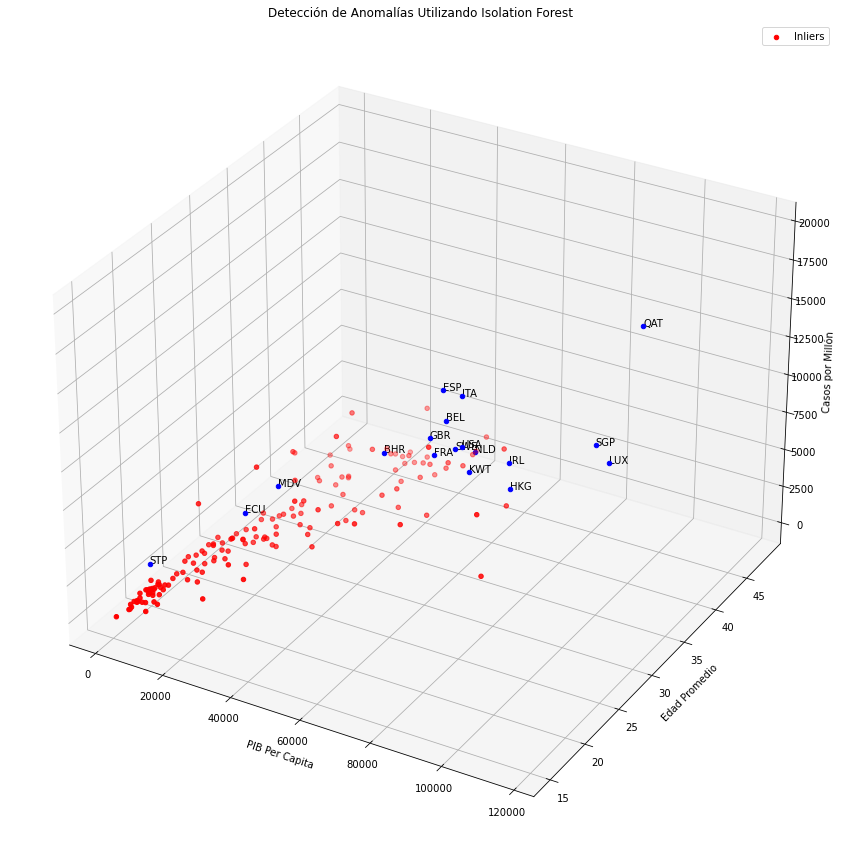

In [104]:

fig = figure(figsize=(12,12))

ax= fig.add_subplot(projection='3d')
ax.set_title('Detección de Anomalías Utilizando Isolation Forest')
ax.set_zlabel("Casos por Millón")
ax.set_xlabel("PIB Per Capita")
ax.set_ylabel("Edad Promedio")
ax.scatter3D(inliers.gdp_per_capita, inliers.median_age, inliers.total_cases_pm, label="Inliers", c="red")
for i in outliers.index:
    ax.scatter(outliers.loc[i, 'gdp_per_capita'], outliers.loc[i,'median_age'], outliers.loc[i,'total_cases_pm'], c='blue')
    ax.text(outliers.loc[i, 'gdp_per_capita'], outliers.loc[i,'median_age'], outliers.loc[i,'total_cases_pm'],\
            '%s' % (i), zorder=1, size=10 )
ax.legend()
plt.tight_layout()
plt.show()

# Finalizando ...

Utilizamos IF de forma similar a k-NN. Primero estandarizamos los datos, luego ajustamos el modelo y realizamos la predicción. Luego separamos los datos en inliers y outliers.

Realizamos una proyección en 3dimensiones (solo consideramos pib, edad promedio, casos por millón).

Explicación en el video.
Al igual que en k-NN tenemos los 3 países (QAT,HKG,SGP) con los valores más negativos (es decir alto puntaje de anomalía). Bélgica le sigue al igual que en k-NN y se debe 



In [105]:
covid_analisis.total_deaths_pm.sort_values(ascending=False)

iso_code
BEL    816.852
ESP    580.197
GBR    566.965
ITA    552.663
FRA    441.251
        ...   
LAO      0.000
ERI      0.000
SYC      0.000
HKG      0.000
FJI      0.000
Name: total_deaths_pm, Length: 175, dtype: float64

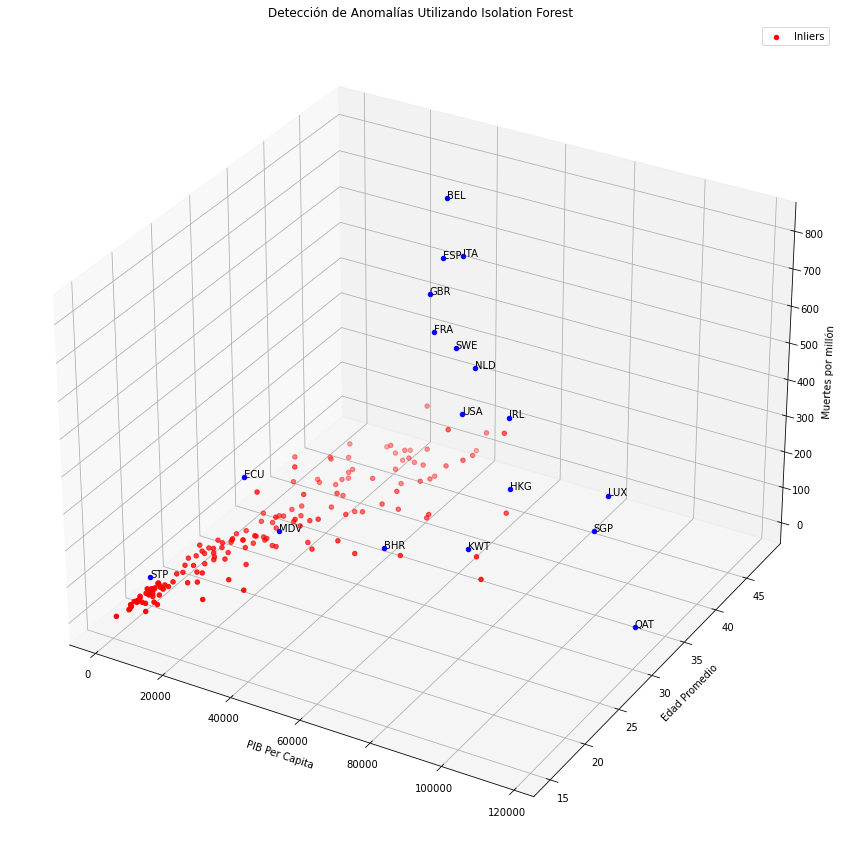

In [106]:

fig = figure(figsize=(12,12))

ax= fig.add_subplot(projection='3d')
ax.set_title('Detección de Anomalías Utilizando Isolation Forest')
ax.set_zlabel("Muertes por millón")
ax.set_xlabel("PIB Per Capita")
ax.set_ylabel("Edad Promedio")
ax.scatter3D(inliers.gdp_per_capita, inliers.median_age, inliers.total_deaths_pm, label="Inliers", c="red")
for i in outliers.index:
    ax.scatter(outliers.loc[i, 'gdp_per_capita'], outliers.loc[i,'median_age'], outliers.loc[i,'total_deaths_pm'], c='blue')
    ax.text(outliers.loc[i, 'gdp_per_capita'], outliers.loc[i,'median_age'], outliers.loc[i,'total_deaths_pm'],\
            '%s' % (i), zorder=1, size=10 )
ax.legend()
plt.tight_layout()
plt.show()